# Aula 12 - Métodos Numéricos

## Interpolação Polinomial

Aluno: Luiz Henrique Garcia Braga dos Reis

##### Seja o experimento:

| x   | 0.5 | 1.2 | 2.1 | 3.5 | 5.4 |
| --- | --- | --- | --- | --- | --- |
| y   | 5.1 | 3.2 | 2.8 | 1.0 | 0.4 |

1) Ajustar uma reta de mínimos quadrados
2) Ajustar um polinômio de 2º grau
3) Ajustar um polinômio de 3º grau
4) Qual dos ajustes acima é o melhor?
5) Compare graficamente os ajustes

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import Luiz_Henrique as lh

### 1) Ajustar uma reta de mínimos quadrados

In [57]:
x = np.array([0.5, 1.2, 2.1, 3.5, 5.4])
y = np.array([5.1, 3.2, 2.8, 1, 0.4])

soma_x = np.sum(x)
soma_y = np.sum(y)
soma_x2 = np.sum(x ** 2)
soma_xy = np.sum(x * y)
n = len(x)

m = np.array([[n, soma_x], [soma_x, soma_x2]])

v = np.array([soma_y, soma_xy])

coeficientes = np.linalg.solve(m, v)
b0, b1 = coeficientes
print(b0 + b1 * x)

[ 4.34846577  3.7141883   2.8986887   1.63013375 -0.09147653]


In [58]:
u1 = b0 + b1 * x

residuos = y - u1
ss_res = np.sum(residuos ** 2)

media_y = np.mean(y)
ss_tot = np.sum((y - media_y) ** 2)

r2_minquad = 1 - ss_res / ss_tot
print(r2_minquad)

0.8944606796298378


### 2) Ajustar um polinômio de 2º grau

In [59]:
x = np.array([0.5, 1.2, 2.1, 3.5, 5.4])
y = np.array([5.1, 3.2, 2.8, 1, 0.4])

In [60]:
m = np.array([[len(x), sum(x), sum(x ** 2)],
                   [sum(x), sum(x ** 2), sum(x ** 3)],
                   [sum(x ** 2), sum(x ** 3), sum(x ** 4)]])

v = np.array([sum(y), sum(y * x), sum(y * x ** 2)])

coeficientes = np.linalg.solve(m, v)
b0, b1, b2 = coeficientes
print(b0 + b1 * x + b2 * x ** 2)

[4.88635129 3.69808352 2.43834398 1.07810144 0.39911976]


In [61]:
u2 = b0 + b1 * x + b2 * x ** 2

residuos = y - u2
ss_res = np.sum(residuos ** 2)

media_y = np.mean(y)
ss_tot = np.sum((y - media_y) ** 2)

r2_2grau = 1 - ss_res / ss_tot
print(r2_2grau)

0.9692408111274403


### 3) Ajustar um polinômio de 3º grau

In [62]:
m = np.array([[len(x), sum(x), sum(x ** 2), sum(x ** 3)],
                   [sum(x), sum(x ** 2), sum(x ** 3), sum(x ** 4)],
                   [sum(x ** 2), sum(x ** 3), sum(x ** 4), sum(x ** 5)],
                   [sum(x ** 3), sum(x ** 4), sum(x ** 5), sum(x ** 6)]])

v = np.array([sum(y), sum(y * x), sum(y * x ** 2), sum(y * x ** 3)])

coeficientes = np.linalg.solve(m, v)
b0, b1, b2, b3 = coeficientes
print(b0 + b1 * x + b2 * x ** 2, b3 * x ** 3)

[4.93674419 3.67886381 2.55717626 1.92051707 3.21434899] [-2.25088454e-03 -3.11162279e-02 -1.66763534e-01 -7.72053398e-01
 -2.83546627e+00]


In [63]:
u3 = b0 + b1 * x + b2 * x ** 2

residuos = y - u3
ss_res = np.sum(residuos ** 2)

media_y = np.mean(y)
ss_tot = np.sum((y - media_y) ** 2)

r2_3grau = 1 - ss_res / ss_tot
print(r2_3grau)

0.35122583729765466


### 4) Qual dos ajustes acima é o melhor?

##### O segundo ajuste, de um polinômio de 2º grau, é o melhor ajuste, pois é o que R² mais se aproxima de 1

### 5) Compare, graficamente, os ajustes

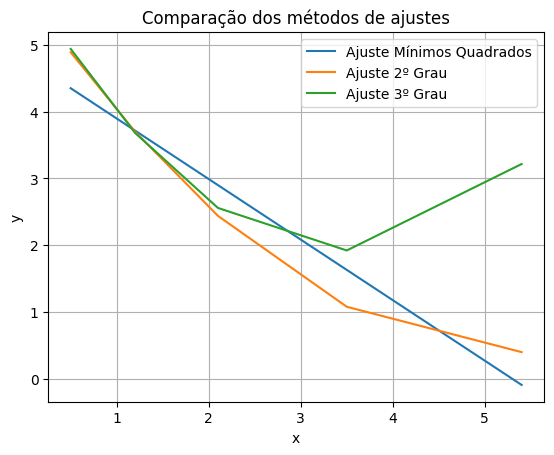

In [64]:
x1 = np.linspace(0.5, 5.4, 50)
plt.plot(x, u1, label='Ajuste Mínimos Quadrados')
plt.plot(x, u2, label='Ajuste 2º Grau')
plt.plot(x, u3, label='Ajuste 3º Grau')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação dos métodos de ajustes')
plt.grid(True)
plt.legend()
plt.show()